In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras import activations
from tensorflow.keras import losses
from sklearn.metrics import accuracy_score, confusion_matrix

from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

import tensorflow.keras.backend as K

In [2]:
train_img = np.load('kmnist-train-imgs.npz')
train_labels = np.load('kmnist-train-labels.npz')
test_img = np.load('kmnist-test-imgs.npz')
test_labels = np.load('kmnist-test-labels.npz')

train_img = train_img['arr_0']
train_labels = train_labels['arr_0']
test_img = test_img['arr_0']
test_labels = test_labels['arr_0']

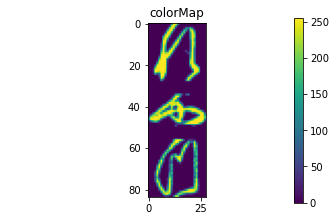

In [3]:
#random_image = random.randint(0, 5999)
#train_img[random_image] # I thought it'd be fun to see the diff characters
arr = np.concatenate((train_img[0], train_img[1], test_img[2]))
H = arr 

fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(H)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

In [4]:
train_img = tf.reshape(train_img, [60000, 28, 28, 1])
test_img = tf.reshape(test_img, [10000, 28, 28, 1])

train_img = tf.cast(train_img, tf.float32)
test_img = tf.cast(test_img, tf.float32)

#train_img = 1/255
#test_img = 1/255

In [5]:
model = keras.Sequential([
       # tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
        layers.Flatten(input_shape = train_img[0].shape),
        layers.Dense(16, activation="relu", input_shape = train_img[0].shape),
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(10, activation=tf.keras.activations.softmax)
    ])
#model.add(tf.keras.layers.Rescaling())
model.add(Flatten())

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
# won't work without the steps per epoch?
# model.fit(epochs=10)
history = model.fit(x = train_img, y = train_labels, batch_size = 128, steps_per_epoch = 1, epochs=1000) # 100000 
avg_acc = 0
avg_loss = 0
for i, k in zip(history.history['loss'], history.history['acc']):
    avg_loss = i + avg_loss
    avg_acc = k + avg_acc

print('avg_loss = ', avg_loss / len(history.history['loss']))
print('avg_acc = ', avg_acc / len(history.history['acc']))
print("min loss: ", min(history.history['loss']))
print("max acc: ", max(history.history['acc']))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2023-05-09 14:08:38.995131: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2023-05-09 14:08:39.004182: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2600000000 Hz
2023-05-09 14:08:39.005222: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5590d5d50750 executing computations on platform Host. Devices:
2023-05-09 14:08:39.005243: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2023-05-09 14:08:39.006861: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2023-05-09 14:08:39.699551: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5590d49a3e20 executing computations on platform CUDA. Devices:
2023-05-09 14:08:39.699602: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device 

In [8]:
results = model.evaluate(test_img, test_labels, batch_size = 128, steps = 1)
predictions = model.predict(test_img, steps = 1)
print("predictions shape:", predictions.shape)
new_pred = []
pred = predictions.tolist()
for i in pred:
    new_pred.append(i.index(max(i)))

print("Accuracy Score: ", accuracy_score(new_pred, test_labels))
print("Confusion Matrix: \n", confusion_matrix(new_pred, test_labels))

1/1 [==============================] - 1s 580ms/step - loss: 1.6625 - acc: 0.5564
predictions shape: (10000, 10)
Accuracy Score:  0.5564
Confusion Matrix: 
 [[709   3   7   4  34   4   4   9  18  10]
 [ 35 290  56  19 109  32  95 172  50  69]
 [ 10  75 558  85  59 333 146  52  56  64]
 [ 22   9  30 724  20  12   8  11  31   4]
 [ 67  43  48  19 639  15  19  72   6  92]
 [ 54   5  28  16   3 370   7  15  13  11]
 [  4  82  86  11  33  42 575  11  31  16]
 [ 44   0  19   6  17  10   2 448   2  28]
 [ 47 483 164 116  71 181 143 205 788 243]
 [  8  10   4   0  15   1   1   5   5 463]]


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(16, (1, 1), activation='relu', input_shape=train_img[0].shape))
model.add(layers.MaxPooling2D((2, 2))) # (1,1) (2, 2)
model.add(layers.Conv2D(16, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation=tf.keras.activations.softmax))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        32        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        272       
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                50192     
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [ ]:
# won't work without the steps per epoch?
# model.fit(epochs=10)
history = model.fit(x = train_img, y = train_labels, batch_size = 128, steps_per_epoch = 1, epochs=1000) # 100000 
avg_acc = 0
avg_loss = 0
for i, k in zip(history.history['loss'], history.history['acc']):
    avg_loss = i + avg_loss
    avg_acc = k + avg_acc

print('avg_loss = ', avg_loss / len(history.history['loss']))
print('avg_acc = ', avg_acc / len(history.history['acc']))
print("min loss: ", min(history.history['loss']))
print("max acc: ", max(history.history['acc']))

2023-05-09 14:09:10.776519: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2023-05-09 14:09:10.785629: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2600000000 Hz
2023-05-09 14:09:10.786712: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x560bb875eb80 executing computations on platform Host. Devices:
2023-05-09 14:09:10.786731: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2023-05-09 14:09:10.788349: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2023-05-09 14:09:11.445230: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x560bba7da670 executing computations on platform CUDA. Devices:
2023-05-09 14:09:11.445287: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device 